In [23]:
from heuristics_constructive import Random

In [24]:
def get_solution_space_cost_sample(n: int) -> list[float]:
    return [Random.get_schedule().cost for s in range(n)]

In [25]:
sample = get_solution_space_cost_sample(1000000)

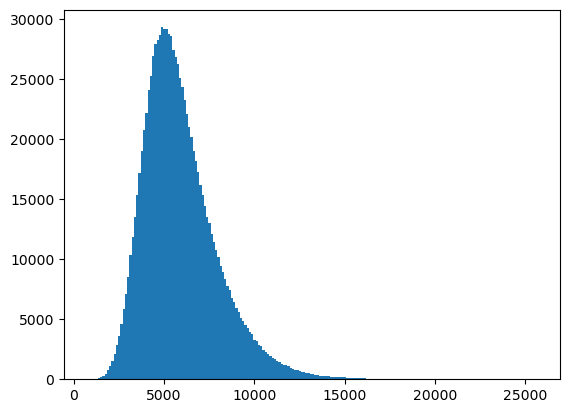

In [26]:
import matplotlib.pyplot as plt

plt.hist(sample, bins = 200)
plt.show()

# Looks like an f-distribution!
### Lets fit one!

In [27]:
import numpy as np
import scipy.stats as stats

shape_a, shape_b, loc, scale = stats.f.fit(sample)
print(shape_a, shape_b, loc, scale)

33.88110333518897 39.202471259341465 -18.295834606674923 5629.301297184755


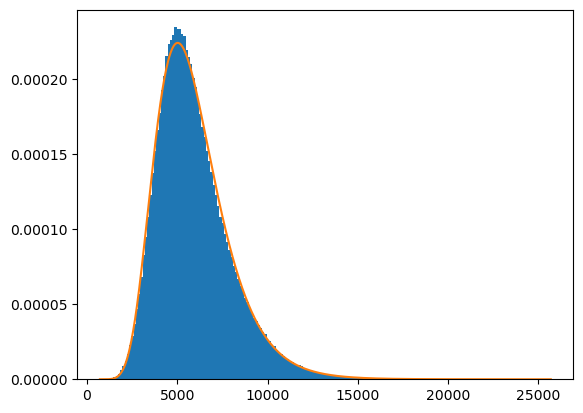

In [28]:
xs = np.linspace(min(sample), max(sample), 1000)
plt.hist(sample, bins = 200, density = True)
plt.plot(xs, stats.f.pdf(xs, shape_a, shape_b, loc = loc, scale = scale))
plt.show()

In [29]:
from distfit import distfit

# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(np.array(sample))

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 1.93455e-07] [loc=5913.916 scale=2051.672]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 2.00811e-06] [loc=713.011 scale=5200.905]
[distfit] >INFO> [pareto    ] [1.60 sec] [RSS: 2.00811e-06] [loc=-492489582561.655 scale=492489583274.666]
[distfit] >INFO> [dweibull  ] [11.3 sec] [RSS: 1.34842e-07] [loc=5700.239 scale=1639.512]
[distfit] >INFO> [t         ] [94.1 sec] [RSS: 1.93455e-07] [loc=5913.916 scale=2051.672]
[distfit] >INFO> [genextreme] [87.1 sec] [RSS: 1.44459e-06] [loc=1337.243 scale=4239.477]
[distfit] >INFO> [gamma     ] [12.6 sec] [RSS: 1.86548e-08] [loc=711.629 scale=763.493]
[distfit] >INFO> [lognorm   ] [1.42 sec] [RSS: 4.8406e-09] [loc=-268.111 scale=5870.099]
[distfit] >INFO> [beta      ] [29.0 sec] [RSS: 2.06783e-08] [loc=712.079 scale=3581988249.579]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 2.31342e-06] [loc=713.011 scale=24968.489]
[distfit] >INFO> [loggamma  ] [14.

{'model': {'name': 'lognorm',
  'score': 4.840595234464703e-09,
  'loc': -268.11068394011676,
  'scale': 5870.0993994185765,
  'arg': (0.3212866518194408,),
  'params': (0.3212866518194408, -268.11068394011676, 5870.0993994185765),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1eb07967450>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 3192.3511307672743,
  'CII_max_alpha': 9689.539133955077},
 'summary':           name     score                  loc                scale  \
 0      lognorm       0.0          -268.110684          5870.099399   
 1        gamma       0.0           711.629458           763.492517   
 2         beta       0.0           712.078547    3581988249.578913   
 3     dweibull       0.0           5700.23929          1639.511826   
 4            t       0.0          5913.915541          2051.671538   
 5         norm       0.0          5913.915783           2051.67197   
 6     loggamma       0.

[distfit] >INFO> Ploting Summary.


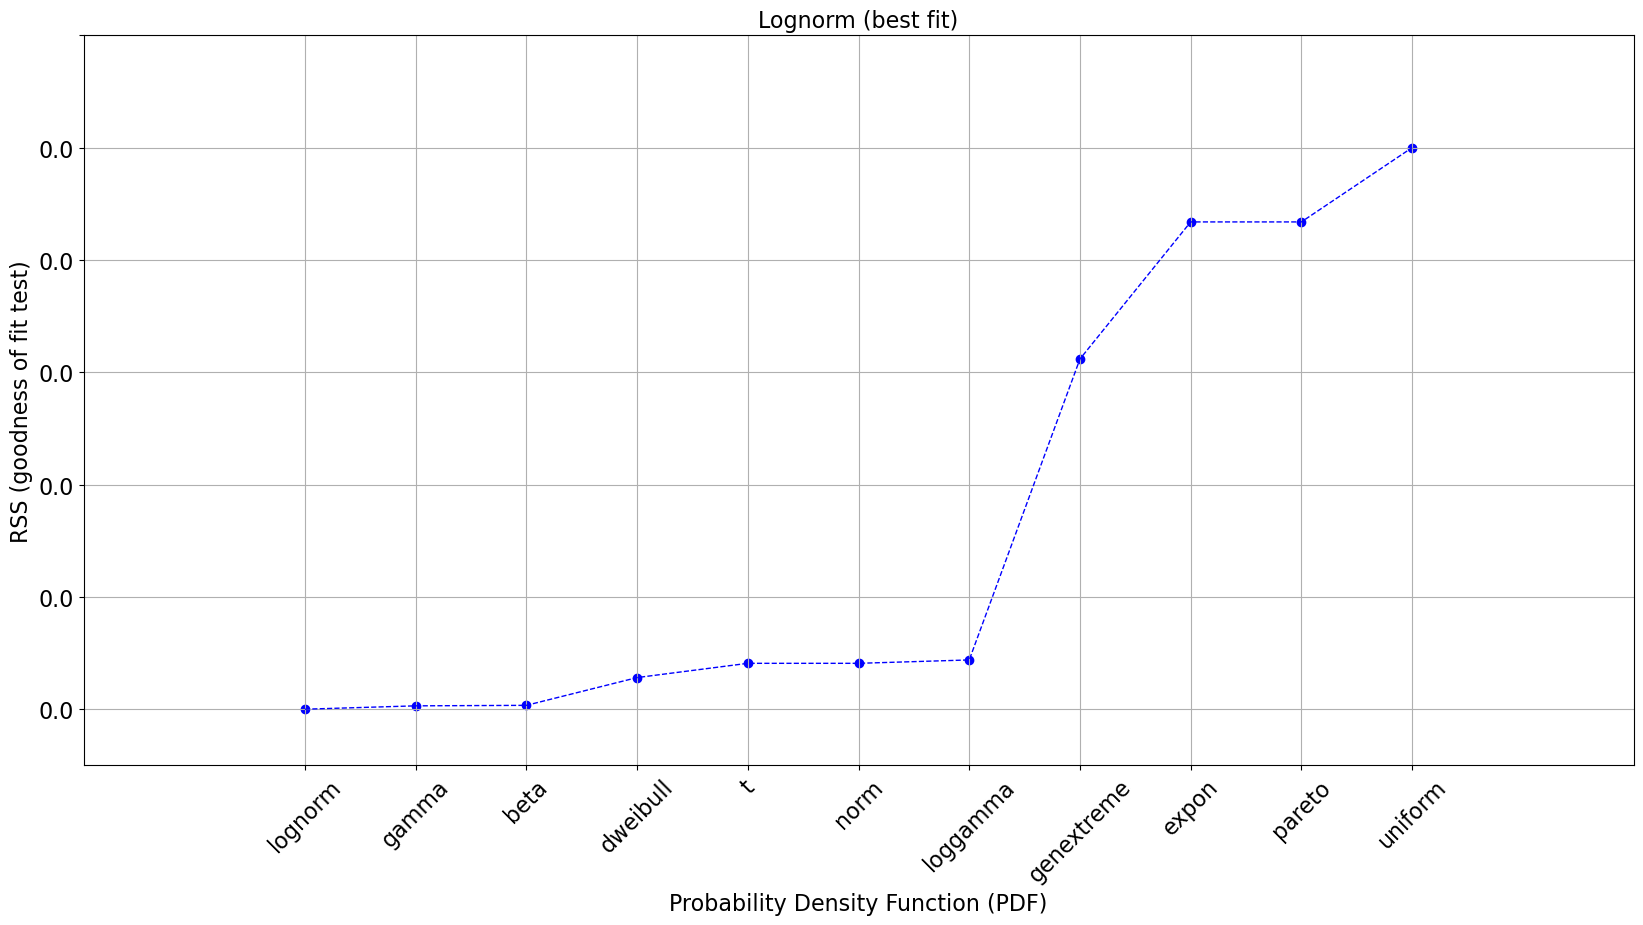

In [30]:
dist.plot_summary()
plt.show()

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Lognorm(loc:-268.110684, scale:5870.099399)


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nlognorm(s=0.321287, loc=-268.111, scale=5870.1)'}, xlabel='Values', ylabel='Frequency'>)

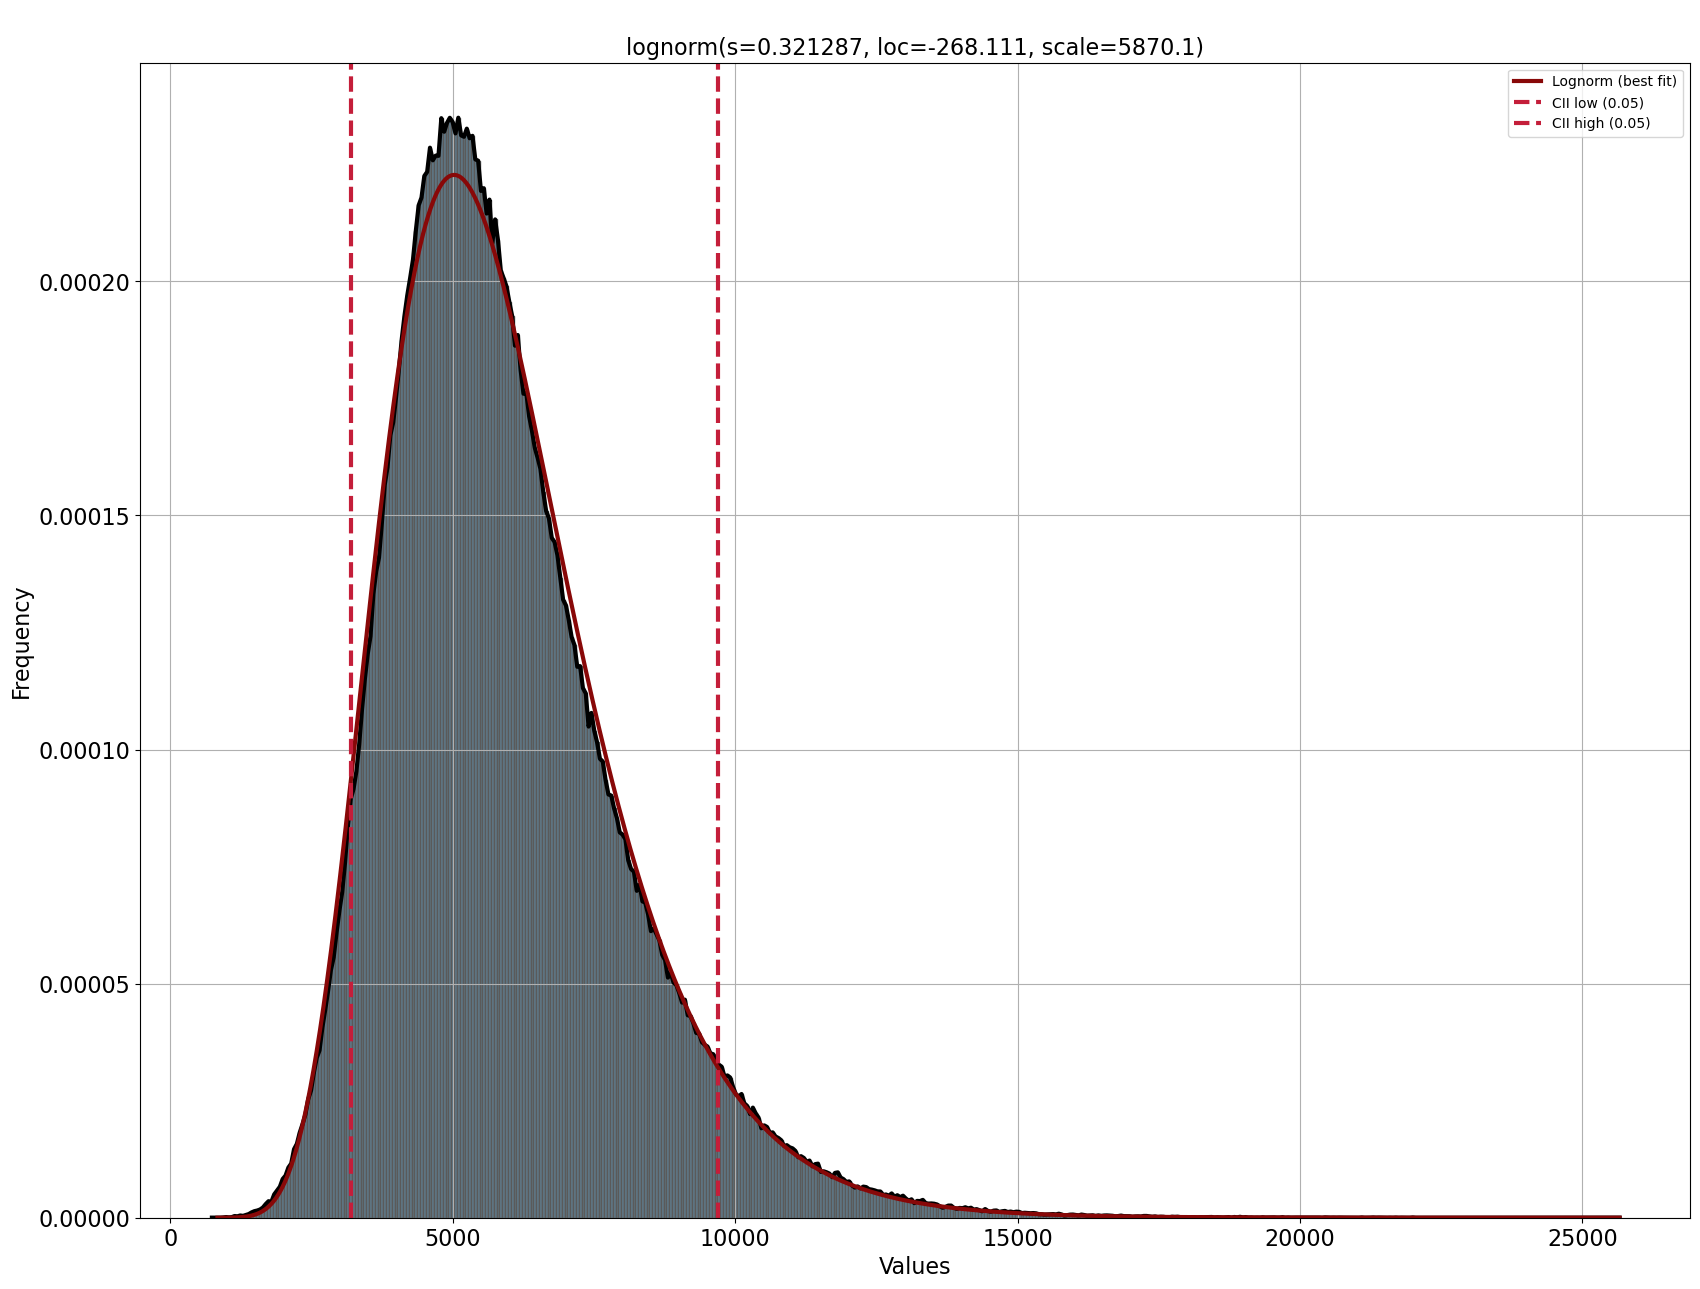

In [31]:
dist.plot()

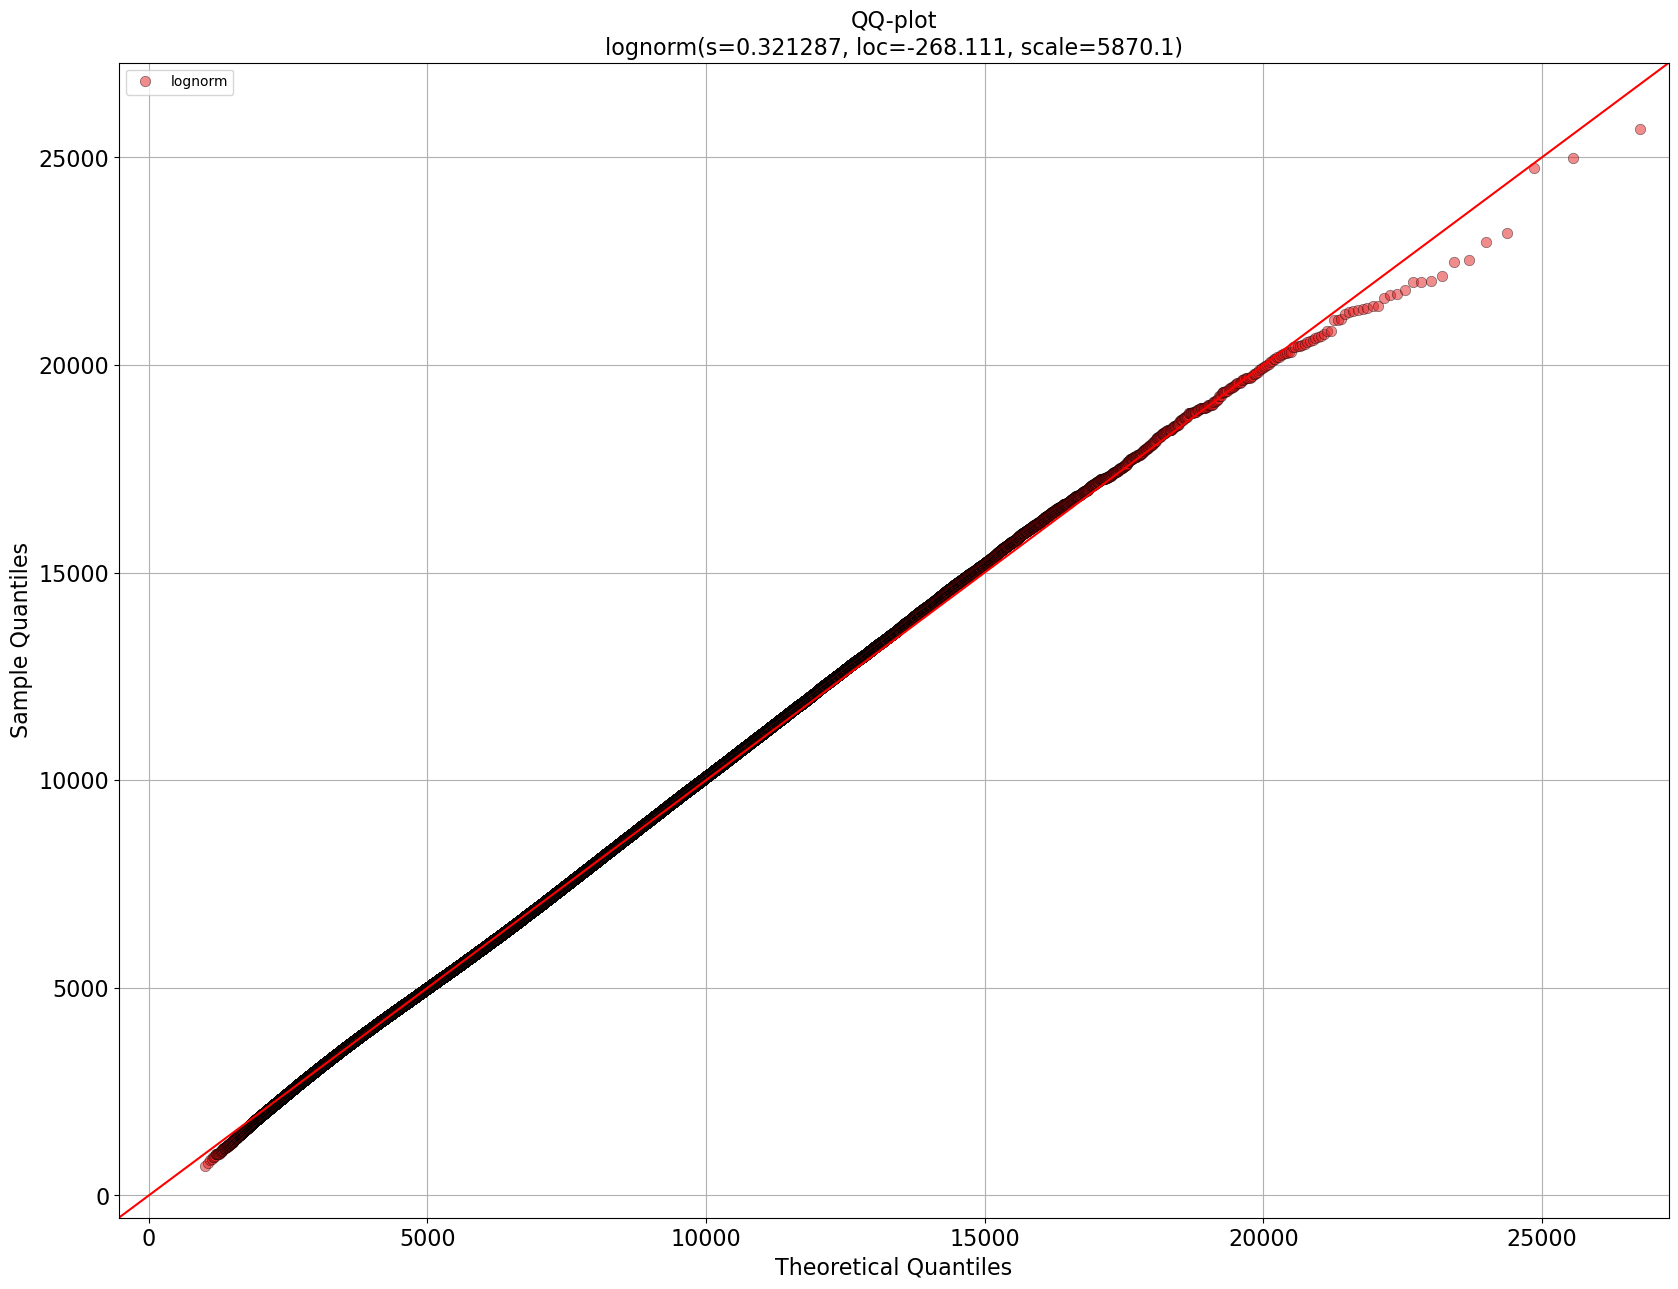

In [32]:
dist.qqplot(np.array(sample))
plt.show()

In [33]:
results = dist.predict(np.array([7000]))
print(results)

[distfit] >INFO> Compute significance for 1 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


{'y': array([7000]), 'y_proba': array([0.25305592]), 'y_pred': array(['none'], dtype='<U4'), 'P': array([0.25305592]), 'y_bool': array([False]), 'df':         y   y_proba y_pred         P
0  7000.0  0.253056   none  0.253056}


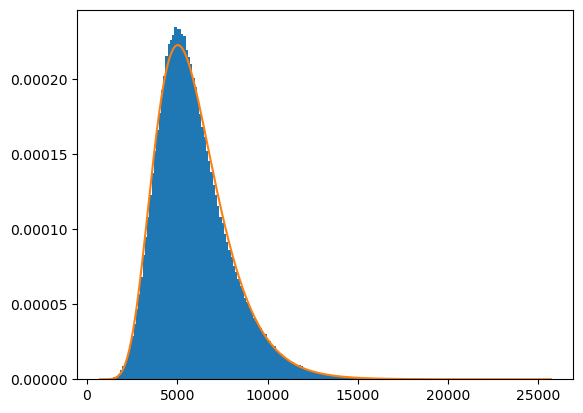

In [34]:
model = stats.lognorm(*dist.model['params'])
plt.hist(sample, bins = 200, density = True)
plt.plot(xs, model.pdf(xs))

In [35]:
# Chance of getting a solution under 100:
model.cdf(100)

3.3703256100880507e-18

In [36]:
# Chance of getting a solution with 0 cost:
model.cdf(0)

3.777111716484363e-22

In [37]:
from paintshop import PaintShop
PS = PaintShop()

In [38]:
# Number of estimated solutions with 0 cost:
PS.solution_space_size * model.cdf(0)

3.4380033566988786e+24